# 데이터 분석 라이브러리 활용하기! 
## - 월드컵 데이터 분석하기  
***Last Edit at May 11. 2023. Dohyeon Kwon***

### 학습 목표
- 파이썬 라이브러리 NumPy, Pandas 와 Matplotlib, Seaborn 을 활용할 수 있다.
- 데이터를 정제하는 데이터 전처리 단계를 수행할 수 있다.
- 데이터를 쉽게 이해하고 분석할 수 있도록 데이터 시각화를 할 수 있다.

---

# Contents
**0. [실습 내용 정리](#0.-실습-내용-정리)**  
- [실습 환경 관련](#--실습-환경-관련)    
- [Pandas DataFrame 관련](#--Pandas-DataFrame-관련)       
- [DataFrame 을 통한 전처리 관련](#--DataFrame-을-통한-전처리-관련)       
- [데이터 시각화 관련](#--데이터-시각화-관련)       

**1. [월드컵 데이터](#1.-월드컵-데이터)**    
1-1. [데이터 분석 준비하기](#1-1.-데이터-분석-준비하기)      
1-2. [전체 데이터 한눈에보기](#1-2.-전체-데이터-한눈에보기)      
1-3. [데이터 전처리](#1-3.-데이터-전처리)      
1-4. [그래프로 확실하게 확인하기](#1-4.-그래프로-확실하게-확인하기)      

**2. [월드컵 매치 데이터](#2.-월드컵-매치-데이터)**     
2-1. [데이터 분석 준비하기](#2-1.-데이터-분석-준비하기)    
2-2. [꼭 필요한 데이터 전처리](#2-2.-꼭-필요한--데이터-전처리)      
2-3. [나라 이름 전처리하기](#2-3.-나라-이름-전처리하기)     
2-4. [국가별 득점 수 구하기](#2-4.-국가별-득점-수-구하기)

---

# 0. 실습 내용 정리

## - 실습 환경 관련
- Jupyter Notebook 은 로컬에서도 설치 및 실행이 가능하다.
    - 로컬 실행 시 실행하는 디렉토리를 루트 디렉토리로 하는 Jupyter 서버가 가동되며, 8888 Port를 사용한다.
- 로컬 환경에서 외부 라이브러리를 활용한 코드가 포함된 코드셀은 NumPy, Pandas, Matplotlib, Seaborn 등 알맞은 라이브러리를 설치해주면 정상 실행 된다.
- import 된 라이브러리 이름은 as 키워드를 통해 별칭을 지정할 수 있다.  
추가로, SQL도 as 를 통해 테이블 및 컬럼에 별칭을 지정할 수 있다.



## - Pandas DataFrame 관련
**한 줄 요약. Pandas == Syntax 만 다른 SQL?**  
<br>
**출력**
- DataFrame 이름만 적어주면 해당 DataFrame 의 전체 내용이 출력된다.
- df.head(n) 메소드로 상위 n 개를 출력시킬 수 있다.  
- df.info() 메소드로 해당 데이터프레임의 컬럼 및 자료형을 확인할 수 있다. SQL의 DESC 와 유사하다.

**연산**
- 기본적으로 DataFrame은 컬럼을 기준으로 연산한다.
- Pandas DataFrame 의 모든 메소드의 반환 내용은 해당 DataFrame에 반영되지 않는다.
    - 데이터프레임의 구조적 변화를 주고 싶다면, 대입연산자를 통해서 해당 DataFrame 또는 별도 변수에 저장시켜야 한다.
- 컬럼의 자료형을 바꾸고 싶다면 df[col].astype("type") 하위 메소드를 사용한다.
- 함수를 실행하고 싶다면, df.apply(func) 하위 메소드를 사용한다.
    - 람다 함수 사용도 가능하다. df.apply(lambda x : x.replace(".", ""))
- 새로운 컬럼을 추가하고 싶다면, df[new_col] = df[col] 과 같이 다른 컬럼의 연산결과가 담킨 컬럼으로 추가할 수 있다.
    - 당연히 DataType 이 일치하지 않는다면 ValueError를 만날 것이다. ZeroDivison 을 만나는 경우도 있을 수 있겠다.
- 결측치(빈 값)이 있는지 확인하고 싶다면, df.isnull().sum() 을 활용한다.
    - df.isnull은 결측치라면 True(1) 을, 아니라면 False(2) 로 변환하는 작업을 수행한다. 당연히 실제 DF에 바로 반영되지 않는다.
    - .sum() 은 이전 메소드의 결과에 대한 모든 합계를 출력한다.
    - 즉 df.isnull().sum 을 하면 각 컬럼에 대한 결측치 합계를 출력시켜준다.
- 만약 하나의 행에 대해 결측치 개수를 확인하고 싶다면 df.isnull.sum(axis = 1) 을 주면 된다.  
- df.concat([df1, df2], axis = n) 로 데이터프레임 또는 컬럼을 이어붙일 수 있다. 당연히 인자인 DF에 바로 반영되지 않는다.  
**axis Tip - 위에서 아래로, 왼쪽에서 오른쪽으로. axis = 0 은 세로, axis = 1 은 가로로 붙여준다고 생각하면 된다.**  

**그룹화**  그룹화 란 해당 컬럼을 기준으로 다른 컬럼들의 값이 재정비 되는 것을 의미한다.
- df.groupby["column"] 을 통해 해당 컬럼을 기준으로 그룹화 할 수 있다. 그룹화 또한 DF에 바로 반영되지는 않는다.  
대입 연산자를 사용하여 보통 새로운 변수 또는 현재 DF에 저장한다.


**정렬** 데이터프레임의 정렬은 컬럼을 기준으로 진행된다.
- **sort_values(ascending = True/False) 는 구문의 가장 마지막에 붙인다.**  
- **df.sort_values() 의 경우 by 키워드를 통해 대상 column을 반드시 지목하여야 한다.  
df.sort_values(by="col", ascending=False)**
- df[col] 로 시작할 경우에는 ascending 만 주면 된다.


## - DataFrame 을 통한 전처리 관련
**대상 확인**
- **Python 기본 메소드인 set() 메소드를 활용하여 수기로 변환이 필요한 결측치를 손쉽게 확인할 수 있다**
    - set 객체는 중복값이 제거 된 형태로 변환되고, set일 때에 한하여 오름차순으로 정렬 된 상태로 출력된다.
- df[col].unique() 메소드를 통해 해당 컬럼에 담긴 데이터 값들을 중복 없이 출력시킬 수 있다. **SQL의 DISTINCT 와 완전히 동일하다.**  
- df.isnull() 메소드는 해당 데이터프레임에 있는 결측치에는 True, 정상 데이터에는 False 로 변환한 DF를 반환한다.
- df.duplicated() 메소드는 해당 데이터프레임에 중복된 행의 개수를 확인하여 중복된 행에는 True, 아닌 행에는 False 로 변환한 df를 반환한다.  
    - 중복된 행이란 모든 컬럼에 대한 값이 전부 일치한 행을 말한다.
- 두 함수 모두 .sum() 메소드를 붙여서 합계만 출력시킬 수 있다.

**제거**
- df.dropna() 메소드를 통해 해당 데이터프레임의 모든 결측치를 제거할 수 있다.
- df.drop_duplicates() 메소드를 통해 해당 데이터프레임에서 중복되는 행을 하나만 남기고 전부 제거할 수 있다.

**채우기**
- df.fillna(.) 메소드를 통해 결측치를 인자로 채울 수 있다.





## - 데이터 시각화 관련   
**Matplotlib 만을 다룬다.** import matplotlib as plt 상태라고 가정한다.  
한줄요약 - Matplotlib 은 가로, 세로 순이다.  

**시각화 자료 크기 지정**
- plt.figure(figsize=(width, height)) 로 시각화 자료의 크기를 지정한다.  
    - 입력된 숫자의 단위 기준은 inch 이다.

**그래프 그리기**
- plt.plot("x", "y", data="df") 로 데이터프레임을 꺾은선 그래프로 만들 수 있다.
- plt.plot() 을 여러 번 반복하면 하나의 figure 안에 여러개의 꺾은선이 추가된 그래프로 만들 수 있다.
- plt.legend() 를 통해 각 선에 대한 범례를 표시할 수 있다
- plt.title("text") 를 통해 그래프의 이름을 정의할 수 있다.
- **만약에 그룹화가 된 데이터프레임이 x, y에 들어간다면 df.index 로 넣어준다.**

**하나의 시각화 자료에 여러 그래프 넣기**  
- plt.subplot(m, n, no) 메소드를 통해 하나의 figure 안에 여러 개의 그래프를 넣을 수 있다.
    - plt.subplot(2, 1, 1) 이라면 행이 두개이고 열이 하나인데 첫 번째 그래프 라는 의미가 된다.
    - plt.subplot(2, 1, 1), plt.subplot(2, 1, 2) 하면 그래프가 세로로 넣어질 것이다.
    - 당연히 plt.plot() 을 여러 개 넣어 꺾은선이 여러 개인 그래프를 만들 수 있다.
- plt.subplot() 메소드를 기준으로 하나의 그래프를 구분한다.
    - 즉 plt.subplot() 사이의 plt.plot() 들은 하나의 그래프에 여러 선이 그어진다.
- **plt.subplot() 은 0을 인자로 취급하지 않는다. 자연수로 센다.**
    

# 1. 월드컵 데이터 

## 1-1. 데이터 분석 준비하기

### (1) Import Modules
**주의** : 꼭 아래 코드 셀을 가장 먼저 실행하신 후, 실습을 진행해주세요!

In [1]:
# numpy
import numpy as np

# pandas
import pandas as pd 

# seaborn
import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### (2) Load Dataset

In [2]:
# read_csv로 csv 파일을 불러옵니다.pandas를 활용해 데이터를 가져와보도록 하겠습니다.
worldcup = pd.read_csv("./src/WorldCups.csv")

# 데이터프레임의 크기를 확인합니다.
print(worldcup.shape)

# 데이터프레임 상위 5개 값 확인
# df 이름만 적으면 df 전체 출력
# head() 메소드로 상위 n개 출력 가능
worldcup.head(5)


(20, 10)


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


- 데이터셋의 각 컬럼에 대한 설명은 다음과 같습니다.


변수명 | 의미 | 예시
- | - | -
Year | 개최 연도 | 1930
Country | 개최 국가 | Uruguay
Winner | 우승 국가 | Uruguay
Runners-Up | 준우승 국가 | Argentina
Third | 3위 국가 | USA
Fourth | 4위 국가 | Yugoslavia
GoalsScored | 총 득점 수 | 70
QualifiedTeams | 참가 국가 수 | 13
MatchesPlayed | 총 경기 수 | 18
Attendance | 총 관중 | 590549

## 1-2. 전체 데이터 한눈에보기
- 데이터프레임의 각 열에 대한 정보와, 비어있는 데이터의 개수를 간단히 확인합니다.

In [3]:
# info 확인하기
worldcup.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


## 1-3. 데이터 전처리
- 먼저 데이터 불러오기를 완료했다면, 데이터 전처리 과정을 진행해보겠습니다. 
- 데이터 전처리 단계에서는 데이터 수집 이후 데이터 정제 과정으로 비어있는 값, 중복값, 이상값 제거, 원하는 형태로의 변환등을 수행합니다.



### (1) `Attendance` : object → int 형으로 변환
- 하나의 컬럼의 값들을 일괄적으로 변환해주기 위해 `astype` 함수를 사용합니다.

In [4]:
# astype 함수를 활용하여 Attendance 컬럼 값을 int형으로 변환
# Attendance 는 총 관중 이므로 int64형 자료여야 분석에 적합함.
worldcup["Attendance"] = worldcup["Attendance"].astype("int64")

ValueError: invalid literal for int() with base 10: '590.549'

- **현재 ValueError 는 실수 값이 int64가 될 수 없기에 나온 것.**
- **보이는 것 처럼 코드 셀은 셀 단위로 디버깅 하기에 용이함.**

#### 1. 사용할 함수 `attendance_to_int` 정의
- 간단하게 `replace`를 활용해서 "."을 없애줍니다.

In [5]:
def attendance_to_int(i):
    # df 에서 넘어오는 값 중 "." 이 있다면 없애준다.
    # 근데 이러면 590.549는 590549가 되는데요?
    i = i.replace(".","")
    return i


In [6]:
attendance_to_int("330.33")


'33033'

**아니 이러면 분석하는 데이터 값이 330이 아니라 33033 이 되잖아요..**

#### 2. 함수 적용결과 간단하게 확인
- 단 하나의 문자열로 먼저 함수의 결과를 확인합니다.

#### 3. 데이터프레임에 `apply` 함수로 적용
- 함수 적용 결과에 문제가 없다면, 전체 데이터프레임에 적용시켜줍니다.

In [7]:
# 판다스 df는 하위 메소드로 apply()를 사용하여 외부 함수를 적용시킬 수 있음
# 람다식을 줘도 됨.
worldcup["Attendance"] = worldcup["Attendance"].apply(attendance_to_int)

# 이제 Attendance 컬럼에 해당하는 데이터는 실수가 사라졌으므로 int64로 형변환
# 근데 이러면 590549가 들어간다니까요..
worldcup["Attendance"] = worldcup["Attendance"].astype("int64")



모두 적용되었습니다. 다시 한 번 데이터셋을 살펴볼까요?

In [8]:
# info() 통한 df 확인
worldcup.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 1.7+ KB


### (2) 경기 당 득점 수 확인하기
- 원본 데이터에는 한 월드컵에서 득점된 전체 골의 수 `GoalsScored`와 진행된 전체 매치 수 `MatchesPlayed`가 있습니다.
- 우리는 이 둘을 활용하여 한 매치 당 득점된 골의 수의 평균을 구해보겠습니다.
- `Goals_per_Match` = `GoalsScored` / `MatchesPlayed`

In [9]:
# 현재 worldcup DF에 Goals_per_Match 라는 새 컬럼 추가
worldcup["Goals_per_Match"] = worldcup["GoalsScored"] / worldcup["MatchesPlayed"]

# worldcup DF 출력
worldcup


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Goals_per_Match
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,4.117647
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,4.666667
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,4.000000
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607,5.384615
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810,3.600000
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172,2.781250
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135,2.781250
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975,2.968750
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753,2.552632


## 1-4. 그래프로 확실하게 확인하기
- 이번엔 데이터를 그래프로 옮겨서 확인해보겠습니다. 
- 시각화 작업은 데이터를 더 빠르고 확실하게 이해하는데에 필수적입니다.


### (1) 전체 관중수, 경기 수 그래프 그려보기

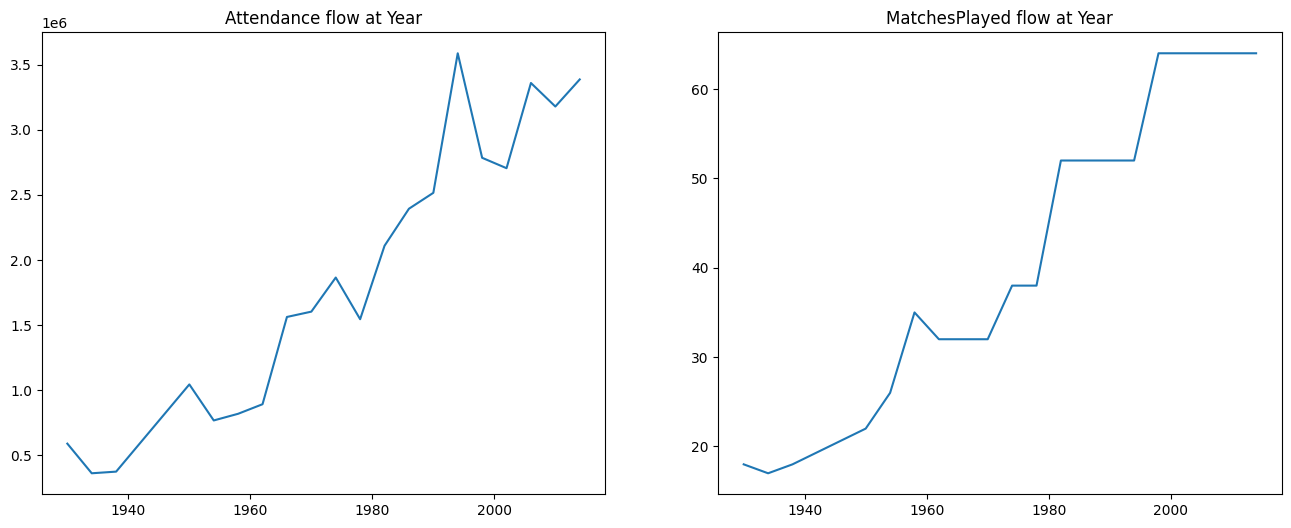

subplot 비교


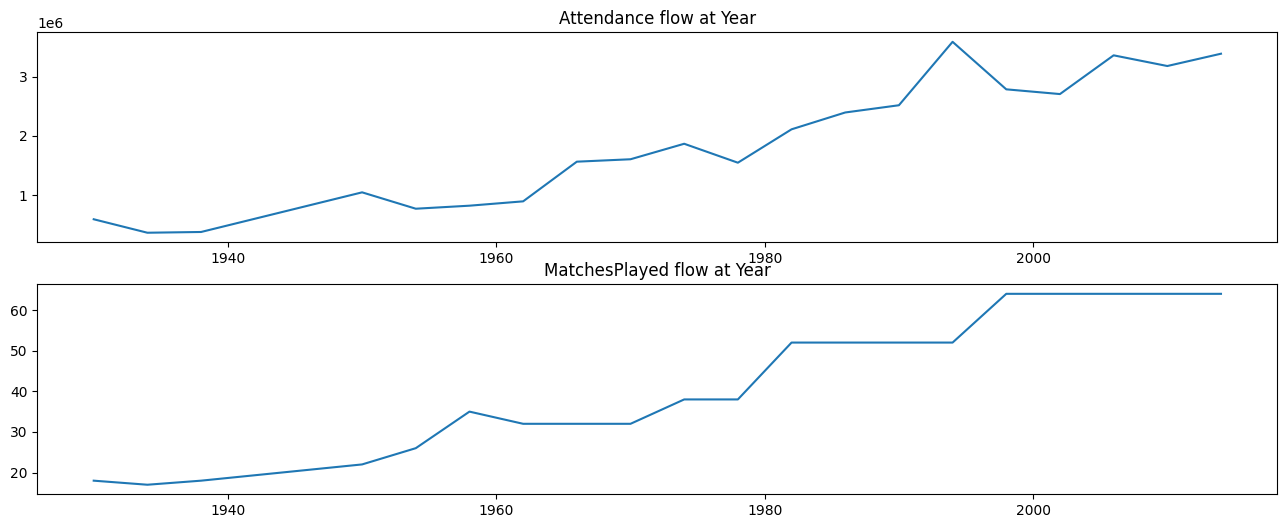

In [10]:
# 그래프 사이즈 설정
# matplotlib 별칭을 plt 로 지정함.
# 가로 16인치, 세로 6인치 - figsize 단위는 inch 임.
plt.figure(figsize=(16,6))

# 한 번에 두 개 이상의 그래프를 그리고 싶다면 subplot을 활용하면 됩니다.
# 그리고자 하는 그래프들을 행(row), 열(column) 로 배열할 때,
# subplot(row, column, order) 순서대로 숫자를 입력하면 됩니다.

# plt.subplot() 통해 그래프를 보여줄 테이블 구조를 선언할 수 있음
# 한 행에 두 개를 보여줄 것이고, 얘가 1번이다. - plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1)

# 실제 그래프 그리기
# X축이 Year, Y축이 Attendance
# 즉 연도가 오른쪽으로 가면서 관중수 증가/하락 을 수직으로 표현하는 그래프 선언.
# 데이터를 가져올 DF는 data = worldcup
plt.plot("Year", "Attendance", data = worldcup)
# 그래프의 제목을 지정할 수 있음
plt.title("Attendance flow at Year")


# 두 번째 subplot 선언
# 기존 테이블 구조 1행 2열에 따라가서 두 번쨰 그래프임을 의미.
plt.subplot(1, 2, 2)

# 실제 그래프 그리기
# 연도가 오른쪽으로 가면서 경기 진행 숫자 증가/하락을 수직으로 표현하는 그래프 선언.
plt.plot("Year", "MatchesPlayed", data = worldcup)
plt.title("MatchesPlayed flow at Year")


# 그래프 실행
plt.show()

# subplot 세로로 놓은 결과 출력.
print("subplot 비교")
plt.figure(figsize=(16,6))

# 1행
plt.subplot(2, 1, 1)
plt.plot("Year", "Attendance", data = worldcup)
plt.title("Attendance flow at Year")

# 2행
plt.subplot(2, 1, 2)
plt.plot("Year", "MatchesPlayed", data = worldcup)
plt.title("MatchesPlayed flow at Year")
plt.show()

### (2) 전체 득점 수, 전체 매치 수, 매치 당 골 수 그래프 그려보기

- 이번에는 득점에 관련된 그래프들을 확인해보겠습니다.

- `GoalsScored`, `MatchesPlayed`, `Goals_per_Match`는 모두 년도별로 비교하면 좋은 데이터이기 때문에, 한 그래프 안에 모두 표현해보겠습니다.

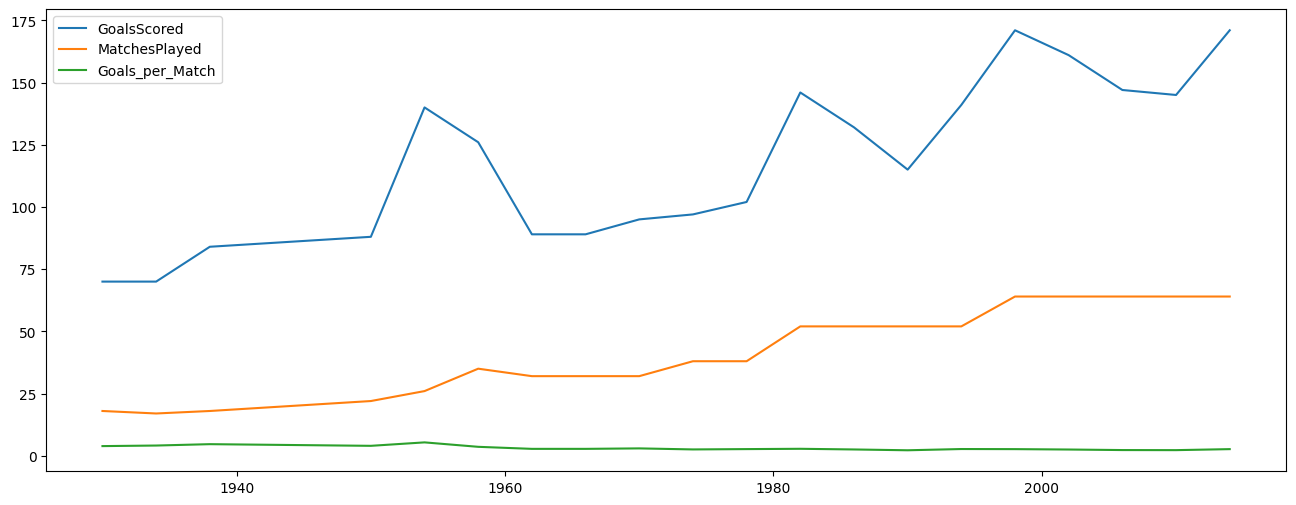

In [11]:
# matplotlib 은 이미 상단에서 import 된 상태이고, 별칭 plt로 되어있음.
plt.figure(figsize=(16, 6))

# 한 그래프 안에 여러 꺽은 선을 표현하려면 subplot을 안주면 됨.
plt.plot("Year", "GoalsScored", data = worldcup)
plt.plot("Year", "MatchesPlayed", data = worldcup)
plt.plot("Year", "Goals_per_Match", data = worldcup)

# legend() 를 통해 각 선에 대한 범례를 표현할 수 있음
plt.legend()

plt.show()



---

# 2. 월드컵 매치 데이터

## 2-1. 데이터 분석 준비하기

### (1) Load Dataset

이번에는 월드컵 매치 데이터를 확인해보겠습니다.     
이번에는 `WorldCupMatches.csv` 데이터를 사용합니다. 역시 pandas로 데이터를 가져옵니다.

In [12]:
# read_csv
match = pd.read_csv("./src/WorldCupMatches.csv")

# shape 출력
print(match.shape)

# 상위 5개 값 확인
match.head(5)


(4572, 20)


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


- 데이터셋의 각 컬럼에 대한 설명은 다음과 같습니다.


변수명 | 의미 | 예시
- | - | -
Year | 경기가 진행된 연도 | 1930
Datetime | 경기 시작 시간 | 13 Jul 1930 - 15:00
Stage | 스테이지(조별리그, 16강, 8강 등) | Group 1
Stadium | 경기장 | Pocitos
City | 도시 | Montevideo
Home Team Name | 홈 팀 국가 이름 | France
Home Team Goals | 홈 팀 득점 수 | 4	
Away Team Goals | 원정 팀 득점 수 | 1
Away Team Name | 원정 팀 국가 이름 | Mexico
Win conditions | 승리 상황  | Italy win after extra time
Attendance | 관중 수 | 4444
Half-time Home Goals | 홈 팀 전반전 득점 수 | 3
Half-time Away Goals | 원정 팀 전반전 득점 수 | 0
Referee | 주심의 이름 | LOMBARDI Domingo (URU)	
Assistant 1 | 제 1 부심(선심)의 이름 | CRISTOPHE Henry (BEL)	
Assistant 2 | 제 2 부심(선심)의 이름 | REGO Gilberto (BRA)	
RoundID | 라운드의 고유 ID | 201
MatchID | 경기의 고유 ID | 1096
Home Team Initials | 홈 팀의 세 글자 이니셜 | FRA
Away Team Initials | 원정 팀의 세 글자 이니셜 | MEX

## 2-2. 꼭 필요한  데이터 전처리
- 데이터를 다루기 전에 꼭 확인하고 처리해야 할 것들이 있습니다. 바로 확인해보겠습니다.

### (1) 전체 데이터 확인

- 세부적으로 보기 이전에, 먼저 전체 데이터를 확인해보겠습니다.

In [13]:
# info 확인
match.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

### (2) 결측치 (빈 데이터)

- 결측치가 있다면 pandas에서 사용하는 대부분의 함수 또는 연산이 작동하지 않습니다. 따라서 결측치를 먼저 확인해주는 습관을 가지고 있으면 좋습니다.




- 결측치는 `isnull()` 함수로 확인해볼 수 있습니다.

In [14]:
# isnull로 결측치 확인

# 상위 5개 레코드만 확인
match.isnull().head(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
# 전체 컬럼별 결측치 개수 확인하기
# isnull 함수는 null 값을 True(1) / 아닌 값을 False(0) 으로 변환시킴.
# 따라서 합계 연산 시 1들의 합이 출력되는 것임.
match.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

### isnull.sum() 연산이 작동되는 원리  
**isnull 함수는 null 값을 True(1) / 아닌 값을 False(0) 으로 변환시킴.  
따라서 합계 연산 시 1들의 합이 출력되는 것임.**

In [16]:
# 총 결측치 개수 확인하기
# 각 컬럼에서 반환된 결측치의 개수를 합산한다.
match.isnull().sum().sum()

74402

In [17]:
# 행 별 결측치 개수 확인하기
match.isnull().sum(axis = 1)

0        0
1        0
2        0
3        0
4        0
        ..
4567    20
4568    20
4569    20
4570    20
4571    20
Length: 4572, dtype: int64

### isnull().sum() 을 통한 행 별 결측치 개수 확인 방법
- Pandas의 sum() 함수는 기본적으로 상위 DataFrame 의 **각 컬럼을 인자로서 실행한다.**
- **sum(axis = 1) 인자를 줄 경우 DataFrame 의 각 행을 인자로서 실행한다.**

### 결측치 확인 결과 모든 컬럼이 null 인 행이 많은 상태이므로 모두 제거한다.

In [18]:
# dropna를 활용하여 null 값이 있는 행 지우기
match = match.dropna()


In [19]:
# 결측치 개수 다시 확인하기
match.isnull().sum()


Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

### (3) 중복된 데이터

- 비어있는 데이터 다음에는 중복된 데이터도 확인해봐야겠죠. `duplicated()` 함수를 활용해 간단히 확인할 수 있습니다.  
- 역시 뒤에 `sum()`을 붙여  개수를 확인해보겠습니다.  

### 2-2(3) 핵심 정리
**duplicated() 함수는 모든 데이터가 중복되는 행들은 True / 아니면 False로 변환한다.**

In [20]:
# 중복된 데이터 개수 확인하기
# duplicated() 함수는 모든 데이터가 중복되는 행들은 True / 아니면 False로 변환한다.
match.duplicated().sum()


15

In [21]:
# drop_duplicates로 중복 데이터 제거하기
# Pandas DF 함수는 반환 내용이 해당 DF에 반영되지 않는다.
# DF 변경이 필요하다면, 반드시 대입연산자를 사용한다.
match = match.drop_duplicates()

In [22]:
# 중복 데이터 개수 다시 확인하기
match.duplicated().sum()

0

## 2-3. 나라 이름 전처리하기
- 뒤에 다양한 분석을 해보기 전에 나라 이름을 먼저 확인해보고 필요한 경우 처리를 해주도록 하겠습니다.

In [23]:
# unique를 사용하여 Home Team Name/Away Team Name 나라 이름 확인
set(match["Home Team Name"].unique())


{'Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Cameroon',
 'Canada',
 'Chile',
 'China PR',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czech Republic',
 'Czechoslovakia',
 "C�te d'Ivoire",
 'Denmark',
 'Ecuador',
 'England',
 'France',
 'German DR',
 'Germany',
 'Germany FR',
 'Ghana',
 'Greece',
 'Haiti',
 'Honduras',
 'Hungary',
 'IR Iran',
 'Iran',
 'Iraq',
 'Italy',
 'Jamaica',
 'Japan',
 'Korea DPR',
 'Korea Republic',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Northern Ireland',
 'Norway',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Scotland',
 'Senegal',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Soviet Union',
 'Spain',
 'Sweden',
 'Switzerland',
 'Togo',
 'Tunisia',
 'Turkey',
 'USA',
 'Ukraine',
 'Uruguay',
 'Wales',
 'Yugoslavia',
 'Zaire',
 'rn">Bosnia and Herzegovina',
 'rn">Republic of Ireland',
 'rn">Serbia and Monte

몇 가지 처리해주어야 할 나라이름들이 보입니다. 다음 나라 이름들을 `replace` 함수로  변환해주도록 하겠습니다.
- `Germany FR` → `Germany`
- `C�te d'Ivoire` → `Côte d’Ivoire`
- `rn">Bosnia and Herzegovina` → `Bosnia and Herzegovina`
- `rn">Serbia and Montenegro` → `Serbia and Montenegro`
- `rn">Trinidad and Tobago` → `Trinidad and Tobago`
- `rn">United Arab Emirates` → `United Arab Emirates`
- `rn">Republic of Ireland` → `Republic of Ireland`
- `Soviet Union` → `Russia`

In [24]:
# replace 사용하여 변환
match = match.replace("Germany FR", "Germany")
match = match.replace("C�te d'Ivoire", "Côte d’Ivoire")
match = match.replace("rn\">Bosnia and Herzegovina", "Bosnia and Herzegovina")
match = match.replace("rn\">Serbia and Montenegro", "Serbia and Montenegro")
match = match.replace("rn\">Trinidad and Tobago", "Trinidad and Tobago")
match = match.replace("rn\">United Arab Emirates", "United Arab Emirates")
match = match.replace("rn\">Republic of Ireland", "Republic of Ireland")
match = match.replace("Soviet Union", "Russia")


In [25]:
# unique 를 활용하여 변환 확인
match["Home Team Name"].unique()

array(['France', 'USA', 'Yugoslavia', 'Romania', 'Argentina', 'Chile',
       'Uruguay', 'Brazil', 'Paraguay', 'Austria', 'Hungary',
       'Switzerland', 'Sweden', 'Germany', 'Spain', 'Italy',
       'Czechoslovakia', 'Cuba', 'England', 'Turkey', 'Russia',
       'Northern Ireland', 'Mexico', 'Wales', 'Portugal', 'Korea DPR',
       'Peru', 'Belgium', 'Bulgaria', 'German DR', 'Zaire', 'Poland',
       'Australia', 'Scotland', 'Netherlands', 'Haiti', 'Tunisia',
       'Algeria', 'Honduras', 'Canada', 'Morocco', 'Korea Republic',
       'Iraq', 'Denmark', 'United Arab Emirates', 'Costa Rica',
       'Cameroon', 'Republic of Ireland', 'Colombia', 'Norway', 'Nigeria',
       'Saudi Arabia', 'Bolivia', 'Greece', 'Jamaica', 'South Africa',
       'Japan', 'Croatia', 'China PR', 'Senegal', 'Slovenia', 'Ecuador',
       'Trinidad and Tobago', 'Serbia and Montenegro', 'Angola',
       'Czech Republic', 'Togo', 'Iran', 'Côte d’Ivoire', 'Ghana',
       'Ukraine', 'Serbia', 'New Zealand', 'Slovak

In [26]:
# unique 를 활용하여 Away Team Name 도 확인
match["Away Team Name"].unique()

array(['Mexico', 'Belgium', 'Brazil', 'Peru', 'France', 'Bolivia',
       'Paraguay', 'Romania', 'Chile', 'USA', 'Yugoslavia', 'Argentina',
       'Egypt', 'Netherlands', 'Switzerland', 'Sweden', 'Spain',
       'Hungary', 'Austria', 'Germany', 'Czechoslovakia',
       'Dutch East Indies', 'Norway', 'Poland', 'Cuba', 'Italy',
       'England', 'Scotland', 'Turkey', 'Korea Republic', 'Uruguay',
       'Wales', 'Northern Ireland', 'Russia', 'Colombia', 'Bulgaria',
       'Korea DPR', 'Portugal', 'Israel', 'Morocco', 'El Salvador',
       'Australia', 'Haiti', 'German DR', 'Zaire', 'IR Iran', 'Tunisia',
       'Iran', 'Cameroon', 'New Zealand', 'Algeria', 'Honduras', 'Kuwait',
       'Iraq', 'Denmark', 'Canada', 'Republic of Ireland',
       'United Arab Emirates', 'Costa Rica', 'Saudi Arabia', 'Greece',
       'Nigeria', 'South Africa', 'Japan', 'Croatia', 'Jamaica',
       'Senegal', 'Slovenia', 'Ecuador', 'China PR', 'Côte d’Ivoire',
       'Czech Republic', 'Ghana', 'Togo', 'Ukraine',

In [27]:
# Home Team Name과 Away Team Name이 동일한지 확인하기
# Pandas에서 set() 함수를 이용하면 출력될 데이터가 오름차순 정렬 된 set 객체로 변환됨.
# 따라서 unique 사용 결과를 set 안에 넣어주면 전처리에 필요한 데이터를 쉽게 확인 할 수 있음.
set(match["Away Team Name"].unique()) - set(match["Home Team Name"].unique()) 




{'Dutch East Indies', 'Egypt', 'El Salvador', 'Israel', 'Kuwait'}

## 2-4. 국가별 득점 수 구하기
- 이번에는 각  국가별 득점 수를 구해보도록 하겠습니다. 어떤 나라가 많은 득점을 했을까요?

#### (1) Home Team과 Away Team 별 데이터 추출하기

- `groupby`로 우리가 원하는 데이터를 추출해낼 수 있습니다. 
- 각 나라가 홈 팀으로 얻은 득점과, 원정팀으로 얻은 득점을 합쳐 구해보겠습니다.

In [28]:
# groupby로 Home Team Name 별 데이터 묶기
match.groupby(["Home Team Name"])



In [29]:
# 득점 확인하기
# sort_values
home = match.groupby(["Home Team Name"])["Home Team Goals"].sum().sort_values(ascending = False)
away = match.groupby(["Away Team Name"])["Away Team Goals"].sum().sort_values(ascending = False)

In [30]:
# home 팀 상위 5개 값 확인
# head()의 기본 인자는 5임.
home.head()

Home Team Name
Brazil       176.0
Germany      163.0
Argentina    109.0
Italy         99.0
Hungary       73.0
Name: Home Team Goals, dtype: float64

In [31]:
# away 팀 상위 5개 값 확인
away.head()

Away Team Name
Germany        59.0
Brazil         45.0
Spain          42.0
France         40.0
Netherlands    37.0
Name: Away Team Goals, dtype: float64

In [32]:
# concat을 활용하여 두개의 Series 데이터 합치기
# concat 의 axis = 1 또한 가로로 이어주겠다는 뜻임.
goal_per_country = pd.concat([home, away], axis = 1)
goal_per_country

,Home Team Goals,Away Team Goals
Brazil,176.0,45.0
Germany,163.0,59.0
Argentina,109.0,22.0
Italy,99.0,29.0
Hungary,73.0,14.0
...,...,...
Egypt,NaN,3.0
Kuwait,NaN,2.0
Israel,NaN,1.0
El Salvador,NaN,1.0


In [33]:
# NaN 값을 0으로 채워주고, 정수로 변환 
# fillna() 함수로 결측치를 특정 값으로 채워줄 수 있음
goal_per_country = goal_per_country.fillna(0).astype('int64')
goal_per_country.isnull().sum()

Home Team Goals    0
Away Team Goals    0
dtype: int64

- 이제 두 값을 더해서 전체 골을 만들어보고, 전체 데이터를 `Goals`로 정렬해주도록 하겠습니다.

In [34]:
# Home Team Goals + Away Team Goals
# sort_values
# sort_values 의 인자로 by="column" 을 사용할 수 있음.
goal_per_country["Goals"] = goal_per_country["Home Team Goals"] + goal_per_country["Away Team Goals"]
goal_per_country = goal_per_country.sort_values(by="Goals", ascending = False)
goal_per_country

,Home Team Goals,Away Team Goals,Goals
Germany,163,59,222
Brazil,176,45,221
Argentina,109,22,131
Italy,99,29,128
France,66,40,106
...,...,...,...
Trinidad and Tobago,0,0,0
Zaire,0,0,0
China PR,0,0,0
Canada,0,0,0


#### (2) 상위 10개국 득점 수 시각화해보기

- 상위 10개국만 그래프로 시각화 해보겠습니다.
- 표에서 나라 이름이 index로 사용되었으므로, x는 `top_10.index`로 넣어주면 됩니다.

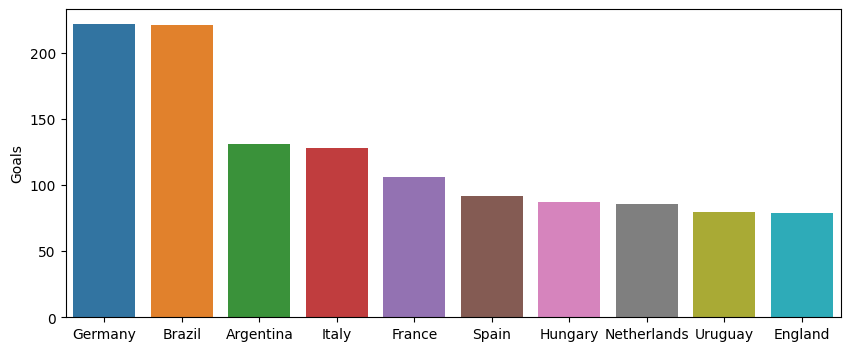

In [35]:
# Seaborn 라이브러리를 통해 Matplotlib 에서 추가된 데이터 시각화가 가능함.
top_10 = goal_per_country[:10]

plt.figure(figsize=(10, 4))
sns.barplot(data=top_10, x=top_10.index, y = "Goals")
plt.show()
